## Ensemble Forecasts

This notebook demonstrates basic ensemble forecasts using `get_solar_forecast_ensemble_subset` and `get_solar_forecast_ensemble`.

In [1]:
import matplotlib.pyplot as plt
from pv_model import model_pv_power
from forecast_solar import get_solar_forecast_ensemble_subset, get_solar_forecast_ensemble
import pandas as pd

Define input variables. Right now, this function only works with ECMWF IFS, but NOAA GEFS may be added in the future. 

The function gets an irradiance forecast using the same approach for IFS in `get_solar_forecast_fast()`, but for multiple ensemble members (up to 50). For temperature, it only gets the ensemble mean, and for wind speed, it just fills in 2 m/s to speed things up a bit. 

In [2]:
init_date = pd.to_datetime('2024-04-10 12:00')
latitude = [33.5, 32, 33]
longitude = [-88.5, -89, -91]
num_members = 4 # up to 50 for IFS
run_length = 48 # needs to be multiple of 6
lead_time_to_start = 18 # needs to be a multiple of 6
model = 'ifs'
attempts = 4

Run the function:

In [3]:
resource = get_solar_forecast_ensemble_subset(
    latitude, longitude, init_date, run_length,
    lead_time_to_start, model, attempts, num_members)

And plot the results:

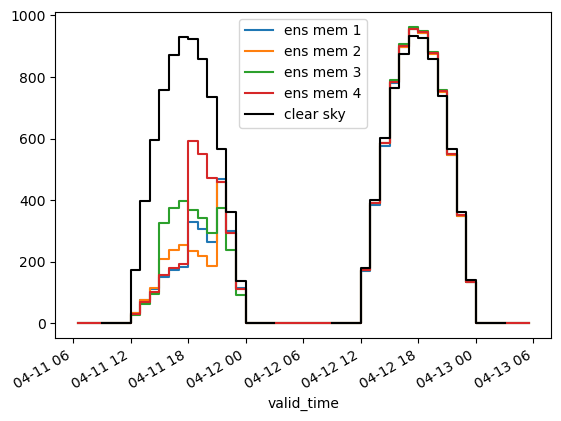

In [4]:
member_list = resource['member'].unique()
point = 0
for member in member_list:
    resource[(resource['member'] == member) & (resource['point'] == point)]['ghi'].plot(label=('ens mem ' + str(member)), drawstyle='steps-mid')
resource[(resource['member'] == member_list[0]) & (resource['point'] == point)]['ghi_clear'].plot(label='clear sky', color='black', drawstyle='steps-mid')
plt.legend()
plt.show()

You could then loop through `member` and `point` (plant) values and model power for each plant/ensemble member combination. Summing power for all plants within each member would give an ensemble aggregate forecast. 

Now, let's get all 50 members from IFS:

In [5]:
resource_all = get_solar_forecast_ensemble(
    latitude, longitude, init_date, run_length,
    lead_time_to_start, model, attempts)

That ran much faster because FastHerbie seems to work much better when downloading .grib2 files before processing them, which the `get_solar_forecast_ensemble` function does.

*Note that the downloaded files remain and take up about 60 MB per NWP valid time.*

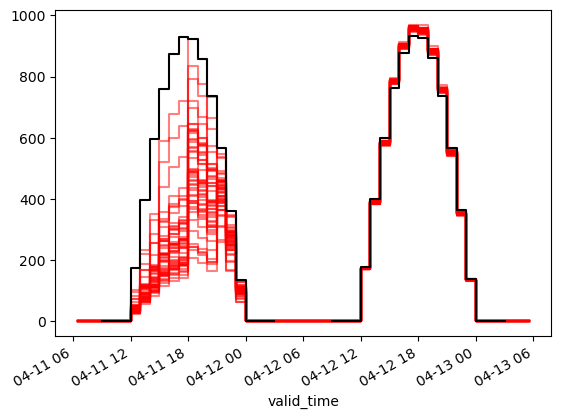

In [6]:
member_list = resource_all['member'].unique()
point = 0
for member in member_list:
    resource_all[(resource_all['member'] == member) & (resource_all['point'] == point)]['ghi'].plot(drawstyle='steps-mid', color='red', alpha=0.5)
resource_all[(resource_all['member'] == member_list[0]) & (resource_all['point'] == point)]['ghi_clear'].plot(label='clear sky', color='black', drawstyle='steps-mid')
plt.show()